# Contents: This script includes-
### 1. Importing libraries and necessary files
### 2. Data Wrangling and Processing
####    -  Dropping columns that are not needed for analysis
####    -  Dropping rows containing unneccesary information
####    -  Making sub sets containing the necessary data for analysis
####    -  Transposing the data set 
### 3.  Time series analysis
####    -  Plotting the line graph
####    -  Decomposing the components 
####    -  Plotting the separate components
####    -  Dickey Fuller test
####    - Plotting the auto correlation graph
####    - Stationarizing the data by ising the differencing method

## Steps
### 1. Importing libraries and the customers data set

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# Turning project folder path into a string
path=r'/Users/jasmeetakaur/Downloads/Jasmeeta/Data Immersion Course/Achievement 6'

In [3]:
# Importing the economic_profile.csv file
df_eco_profile=pd.read_csv(os.path.join(path,'profile_by_county_1969_2019.csv'),encoding = "ISO-8859-1", index_col = False)

### 2. Data Wrangling 

In [4]:
# Sanity testing the data frame contents
df_eco_profile.head(10)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""00000""",United States,,CAINC30,10.0,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,...,12541995000,13315478000,13998383000,14175503000,14982715000,15717140000,16151881000,16937582000,17839255000,18542262000
1,"""00000""",United States,,CAINC30,45.0,...,Net earnings by place of residence,Thousands of dollars,609767000,647228000,...,8044221000,8531667000,8956340000,9132669000,9539185000,9915088000,10145493000,10626821000,11167886000,11667012000
2,"""00000""",United States,,CAINC30,50.0,...,Personal current transfer receipts,Thousands of dollars,62322000,74733000,...,2325117000,2358654000,2362988000,2424297000,2541510000,2685370000,2776746000,2855049000,2970254000,3125174000
3,"""00000""",United States,,CAINC30,60.0,...,Income maintenance benefits 1/,Thousands of dollars,7275000,9897000,...,256034000,264137000,267614000,271171000,270971000,273685000,270259000,268468000,260380000,268682000
4,"""00000""",United States,,CAINC30,70.0,...,Unemployment insurance compensation,Thousands of dollars,2328000,4200000,...,139715000,107871000,84439000,63049000,35787000,32860000,32482000,30756000,28302000,28075000
5,"""00000""",United States,,CAINC30,80.0,...,Retirement and other,Thousands of dollars,52719000,60636000,...,1929368000,1986646000,2010935000,2090077000,2234752000,2378825000,2474005000,2555825000,2681572000,2828417000
6,"""00000""",United States,,CAINC30,90.0,...,"Dividends, interest, and rent 2/",Thousands of dollars,119140000,133564000,...,2172657000,2425157000,2679055000,2618537000,2902020000,3116682000,3229642000,3455712000,3701115000,3750076000
7,"""00000""",United States,,CAINC30,100.0,...,Population (persons) 3/,Number of persons,201298000,203798722,...,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
8,"""00000""",United States,,CAINC30,110.0,...,Per capita personal income 4/,Dollars,3931,4198,...,40547,42739,44605,44860,47071,49019,50015,52118,54606,56490
9,"""00000""",United States,,CAINC30,120.0,...,Per capita net earnings 4/,Dollars,3029,3176,...,26006,27384,28539,28901,29969,30923,31416,32699,34185,35544


In [5]:
df_eco_profile.shape

(99142, 59)


####  Dropping unnecessary columns 

In [6]:
# Dropping columns which are not informative
df_eco_profile = df_eco_profile.drop(columns = ['GeoFIPS', 'IndustryClassification', 'TableName', 'LineCode', 'Region', 'Unit'])

In [7]:
df_eco_profile.head(10)

,GeoName,Description,1969,1970,1971,1972,1973,1974,1975,1976,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,Personal income (thousands of dollars),791229000,855525000,924613000,1016408000,1133468000,1244912000,1362505000,1495704000,...,12541995000,13315478000,13998383000,14175503000,14982715000,15717140000,16151881000,16937582000,17839255000,18542262000
1,United States,Net earnings by place of residence,609767000,647228000,691113000,760604000,843628000,908874000,970319000,1072073000,...,8044221000,8531667000,8956340000,9132669000,9539185000,9915088000,10145493000,10626821000,11167886000,11667012000
2,United States,Personal current transfer receipts,62322000,74733000,88248000,98130000,112848000,133639000,170424000,184845000,...,2325117000,2358654000,2362988000,2424297000,2541510000,2685370000,2776746000,2855049000,2970254000,3125174000
3,United States,Income maintenance benefits 1/,7275000,9897000,12220000,13398000,13935000,17887000,21480000,23998000,...,256034000,264137000,267614000,271171000,270971000,273685000,270259000,268468000,260380000,268682000
4,United States,Unemployment insurance compensation,2328000,4200000,6190000,6051000,4587000,7038000,18178000,16551000,...,139715000,107871000,84439000,63049000,35787000,32860000,32482000,30756000,28302000,28075000
5,United States,Retirement and other,52719000,60636000,69838000,78681000,94326000,108714000,130766000,144296000,...,1929368000,1986646000,2010935000,2090077000,2234752000,2378825000,2474005000,2555825000,2681572000,2828417000
6,United States,"Dividends, interest, and rent 2/",119140000,133564000,145252000,157674000,176992000,202399000,221762000,238786000,...,2172657000,2425157000,2679055000,2618537000,2902020000,3116682000,3229642000,3455712000,3701115000,3750076000
7,United States,Population (persons) 3/,201298000,203798722,206817509,209274882,211349205,213333635,215456585,217553859,...,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
8,United States,Per capita personal income 4/,3931,4198,4471,4857,5363,5836,6324,6875,...,40547,42739,44605,44860,47071,49019,50015,52118,54606,56490
9,United States,Per capita net earnings 4/,3029,3176,3342,3634,3992,4260,4504,4928,...,26006,27384,28539,28901,29969,30923,31416,32699,34185,35544


In [8]:
# Making a subset containing only data for Unted States
df_sub = df_eco_profile[df_eco_profile["GeoName"].isin(["United States"])]

In [9]:
df_sub.head()

,GeoName,Description,1969,1970,1971,1972,1973,1974,1975,1976,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,Personal income (thousands of dollars),791229000,855525000,924613000,1016408000,1133468000,1244912000,1362505000,1495704000,...,12541995000,13315478000,13998383000,14175503000,14982715000,15717140000,16151881000,16937582000,17839255000,18542262000
1,United States,Net earnings by place of residence,609767000,647228000,691113000,760604000,843628000,908874000,970319000,1072073000,...,8044221000,8531667000,8956340000,9132669000,9539185000,9915088000,10145493000,10626821000,11167886000,11667012000
2,United States,Personal current transfer receipts,62322000,74733000,88248000,98130000,112848000,133639000,170424000,184845000,...,2325117000,2358654000,2362988000,2424297000,2541510000,2685370000,2776746000,2855049000,2970254000,3125174000
3,United States,Income maintenance benefits 1/,7275000,9897000,12220000,13398000,13935000,17887000,21480000,23998000,...,256034000,264137000,267614000,271171000,270971000,273685000,270259000,268468000,260380000,268682000
4,United States,Unemployment insurance compensation,2328000,4200000,6190000,6051000,4587000,7038000,18178000,16551000,...,139715000,107871000,84439000,63049000,35787000,32860000,32482000,30756000,28302000,28075000


In [10]:
df_sub.shape

(31, 53)

In [11]:
# Removing the preceding and trailing white spaces in the "Description" column
df_sub['Description'] = df_sub['Description'].str.strip()

In [12]:
# Making a subset containing only Per capita personal income data 
df_sub1 = df_sub[df_sub["Description"].isin(["Per capita personal income 4/"])]

In [13]:
df_sub1.head()

,GeoName,Description,1969,1970,1971,1972,1973,1974,1975,1976,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
8,United States,Per capita personal income 4/,3931,4198,4471,4857,5363,5836,6324,6875,...,40547,42739,44605,44860,47071,49019,50015,52118,54606,56490


In [14]:
# Droppping 'GeoName' column
df_sub1 = df_sub1.drop(columns = ['GeoName'])

In [15]:
df_sub1.head()

,Description,1969,1970,1971,1972,1973,1974,1975,1976,1977,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
8,Per capita personal income 4/,3931,4198,4471,4857,5363,5836,6324,6875,7516,...,40547,42739,44605,44860,47071,49019,50015,52118,54606,56490


In [16]:
# Melt the DataFrame to unpivot it
melted_df = pd.melt(df_sub1, id_vars=['Description'], var_name='Year', value_name='Per capita personal income')

# Drop the 'description' column
df_uspercapita = melted_df.drop(columns=['Description'])
df_uspercapita.shape

(51, 2)

In [17]:
df_uspercapita.head()

,Year,Per capita personal income
0,1969,3931
1,1970,4198
2,1971,4471
3,1972,4857
4,1973,5363


In [18]:

# Set the "Date" column as the index
df_uspercapita.set_index('Year', inplace=True)

# Make sure the index is a DateTimeIndex with frequency set to 'Y' (Year)
df_uspercapita.index = pd.to_datetime(df_uspercapita.index, format='%Y')

In [19]:
df_uspercapita.head(32)

,Per capita personal income
Year,
1969-01-01,3931
1970-01-01,4198
1971-01-01,4471
1972-01-01,4857
1973-01-01,5363
1974-01-01,5836
1975-01-01,6324
1976-01-01,6875
1977-01-01,7516


In [20]:
# converting the data type of Per capita personal income from object to float
df_uspercapita['Per capita personal income'] = df_uspercapita['Per capita personal income'].astype(float)

In [21]:
df_uspercapita.head(32)

,Per capita personal income
Year,
1969-01-01,3931.0
1970-01-01,4198.0
1971-01-01,4471.0
1972-01-01,4857.0
1973-01-01,5363.0
1974-01-01,5836.0
1975-01-01,6324.0
1976-01-01,6875.0
1977-01-01,7516.0


### 3. Time series analysis

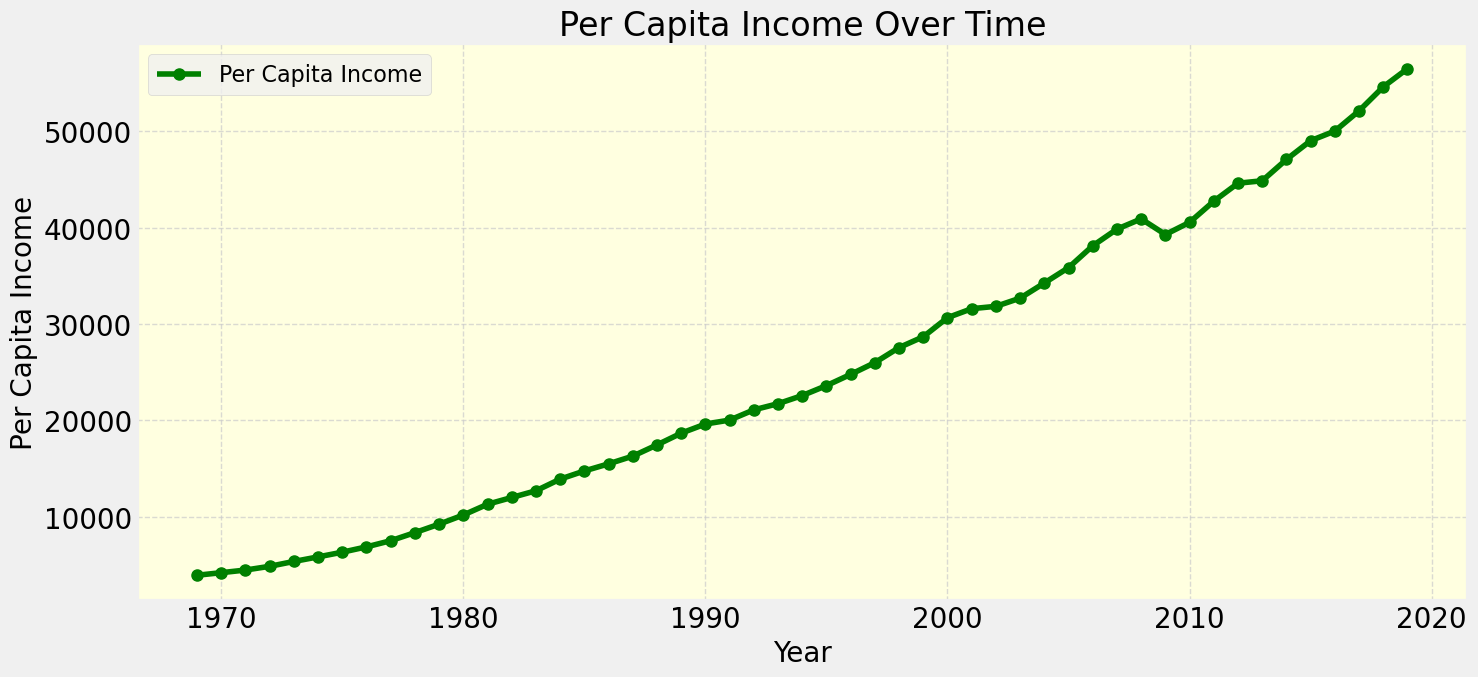

In [41]:
# Plot the line graph



import matplotlib.pyplot as plt

# Your existing code
plt.figure(figsize=(15, 7), dpi=100)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(df_uspercapita, label='Per Capita Income', color='green', linestyle='-', marker='o', markersize=8)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Per Capita Income', fontsize=20)
plt.title('Per Capita Income Over Time', fontsize=24)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=16)

# Customize background color
plt.gca().set_facecolor('lightyellow')
plt.tight_layout()

# Save the plot
plt.savefig('timeseries_plot_population_income.png')

# Display the plot
plt.show()


In [254]:

# Ensure frequency is set to 'Y' (Year), also 'pad' will forward-fill missing values from the previous year:
df_uspercapita = df_uspercapita.asfreq('Y', method='pad')

df_uspercapita.head()

,Per capita personal income
Year,
1969-12-31,3931.0
1970-12-31,4198.0
1971-12-31,4471.0
1972-12-31,4857.0
1973-12-31,5363.0


In [255]:

# Decomposing the components
decomposition = sm.tsa.seasonal_decompose(df_uspercapita, model='additive')


In [256]:

from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

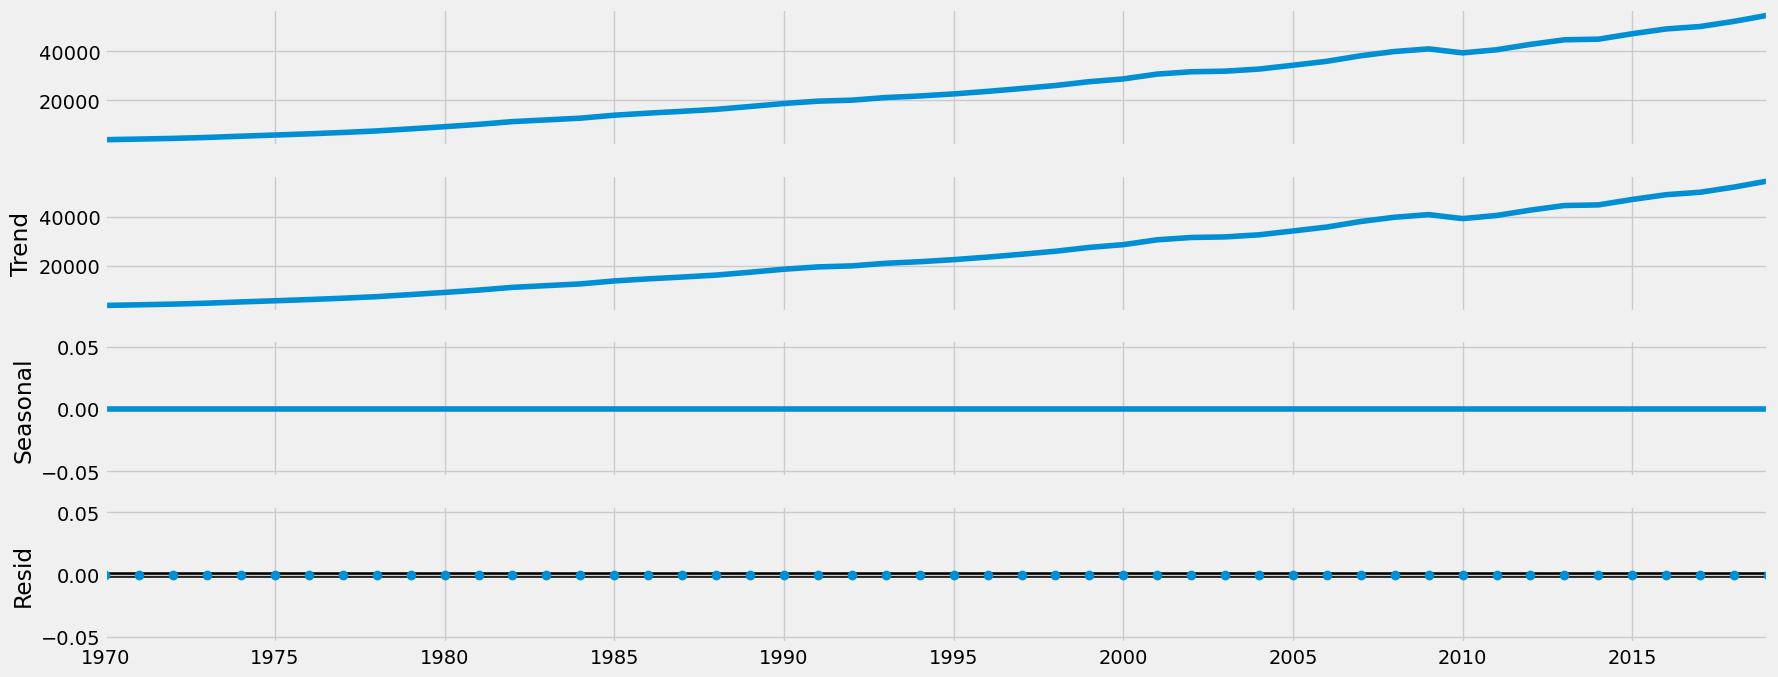

In [257]:
# Plotting the separate components

decomposition.plot()
plt.show()

### Analysis 
### 1. The trend in the chart rises in a linear fashion (a dominant trend), with a slight drop in 2009.

### 2. Since in my case the residual is negligible, the level and trend appear the same.

### 3. The seasonality component in my time series decomposition is appearing flat, it suggests that the per capita income values do not exhibit a pronounced seasonal trend over the years. This could be the case if there is minimal variation or if the data does not follow a clear seasonal pattern.


In [260]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_uspercapita['Per capita personal income'])

Dickey-Fuller Stationarity test:
Test Statistic                  1.754370
p-value                         0.998254
Number of Lags Used            10.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


### Interpretation of the result
### 1. As can be seen from the results of the Dickey-Fuller Stationarity test, the test statistic value is higher than the critical value of any significance level and the p value is high. 
### 2. This indicates that the data is non stationary and I cannot reject the null hypothesis.
### 3. I need to stationarize my data by using the differencing method.

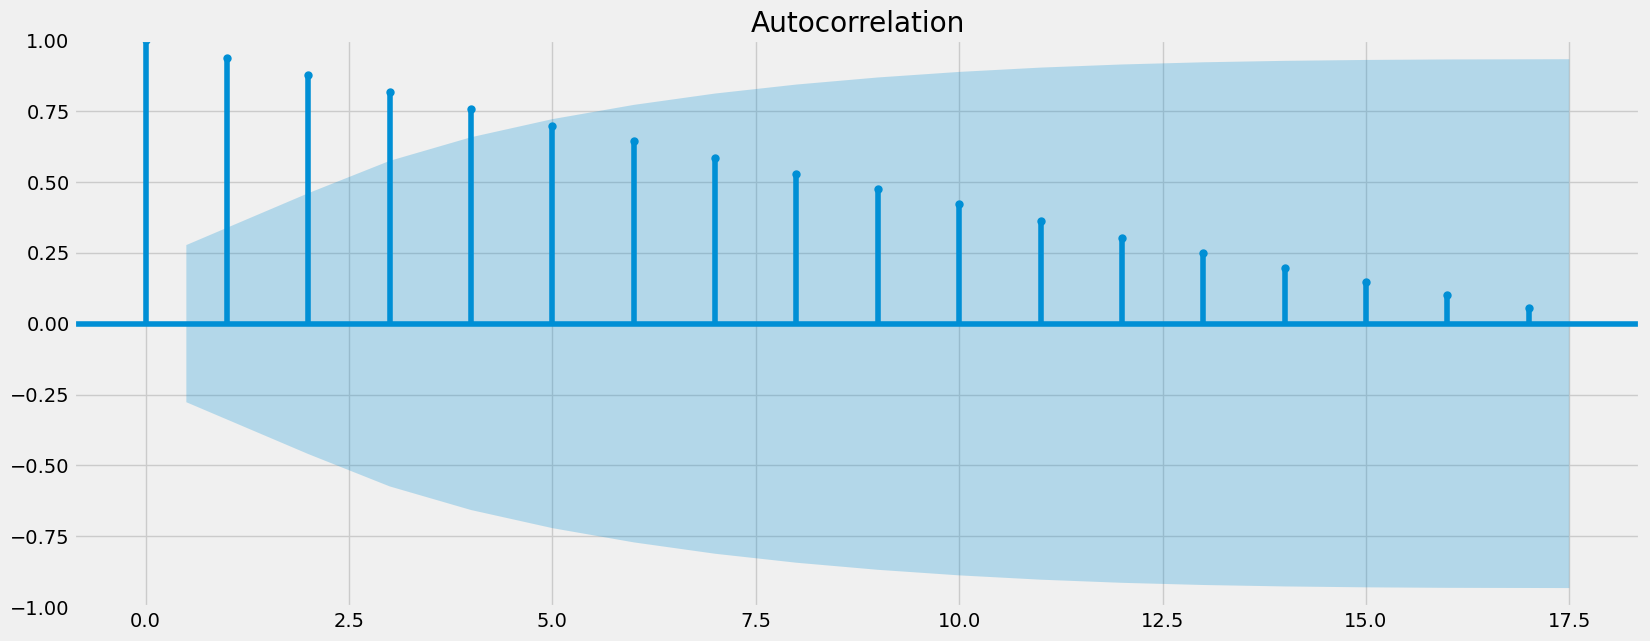

In [261]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_uspercapita)
plt.show()

### 5. Stationarizing the Data

In [262]:
data_diff = df_uspercapita - df_uspercapita.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [263]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [264]:
data_diff.head()

,Per capita personal income
Year,
1970-12-31,267.0
1971-12-31,273.0
1972-12-31,386.0
1973-12-31,506.0
1974-12-31,473.0


In [265]:
data_diff.columns

Index(['Per capita personal income'], dtype='object')

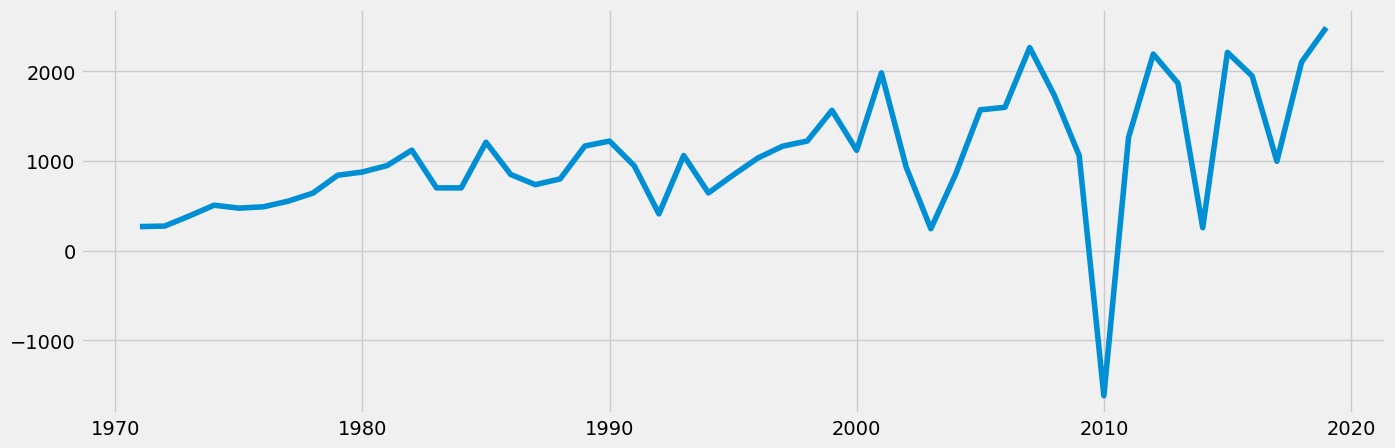

In [266]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [267]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.884209
p-value                         0.339526
Number of Lags Used            10.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


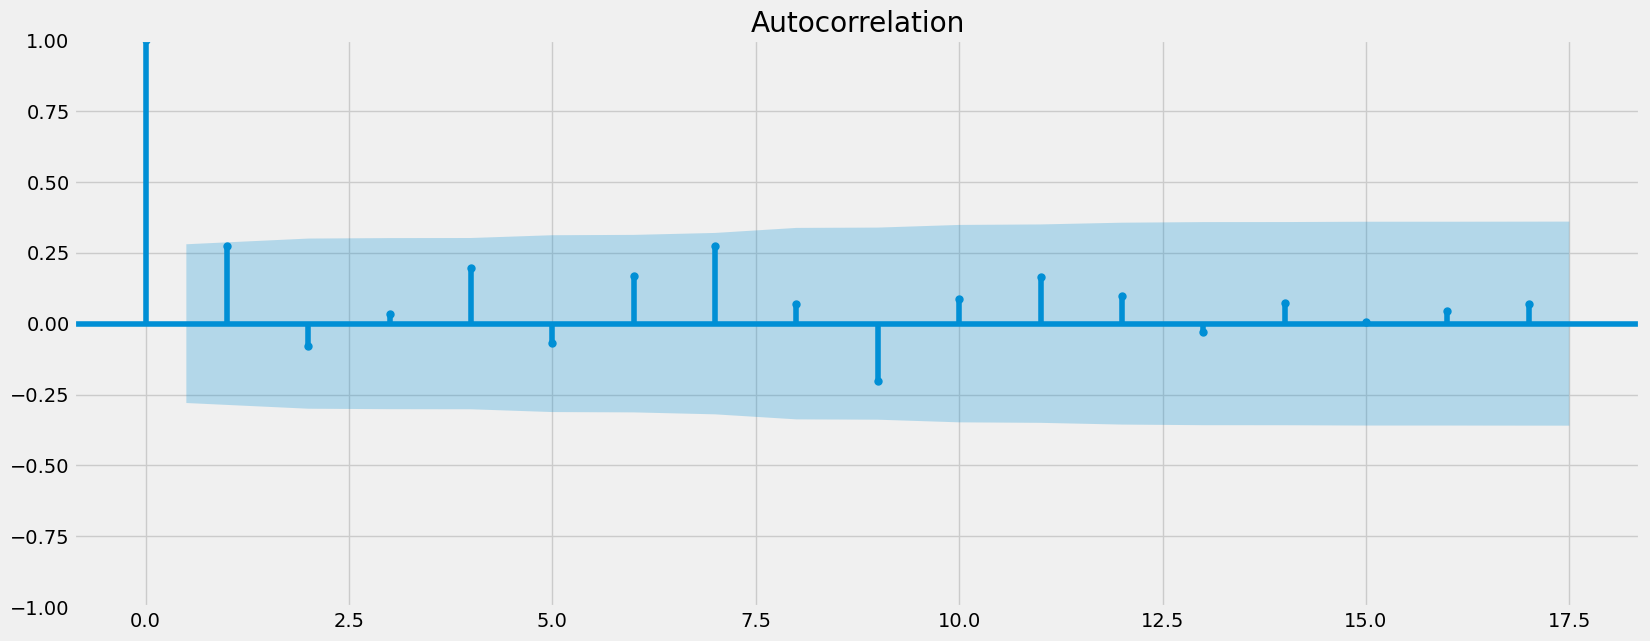

In [268]:
plot_acf(data_diff)
plt.show()

### The test statistic is still higher than any of the critical values. 
### Hence stationarizing it again by using the differencing method.

In [278]:
data_diff1 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [279]:
data_diff1.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [280]:
data_diff1.head()

,Per capita personal income
Year,
1971-12-31,6.0
1972-12-31,113.0
1973-12-31,120.0
1974-12-31,-33.0
1975-12-31,15.0


In [281]:
data_diff1.columns

Index(['Per capita personal income'], dtype='object')

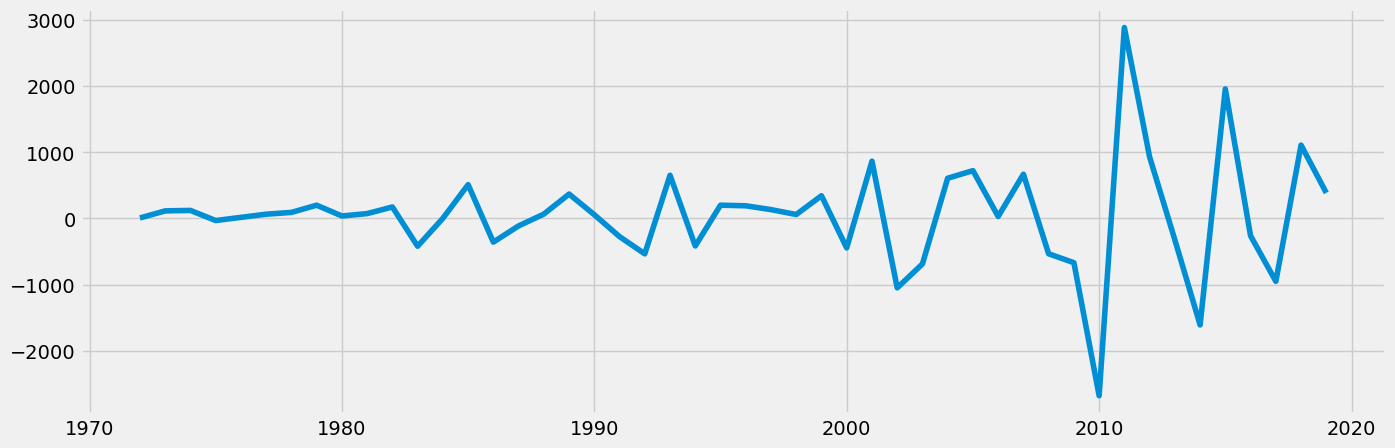

In [282]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff1)

In [283]:
dickey_fuller(data_diff1)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.695299
p-value                         0.000086
Number of Lags Used             8.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


### Final Analysis
### 1. The test statistic is now smaller than the critical value at both the five and ten percent significance levels.
### 2. I also have a satisfactory p-value (p<0.05). 
### 3. This means I can reject the null hypothesis and, as a result, consider my series stationary.